In [1]:
%load_ext autoreload
%autoreload 2

import vix_calc
import sqlite3
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
conn = sqlite3.connect("../data_aggregation/flow_database.db")
conn.row_factory = vix_calc.my_row_factory
cursor = conn.cursor()

DT = '2022-01-07'

In [6]:
d = datetime.strptime(DT, '%Y-%m-%d')
(d + timedelta(days=365)).strftime('%Y-%m-%d')

'2023-01-07'

In [19]:
def query_spy(DT):
    d = datetime.strptime(DT, '%Y-%m-%d')
    for_dt = (d + timedelta(days=365)).strftime('%Y-%m-%d')
    query = f"""
    select
        open,
        close,
        date_of,
        date_of_close
    from price_data

    where symbol = 'SPY'
    and date_of_close >= '{DT}'
    and date_of_close <= '{for_dt}'
    ;
    """

    cursor.execute(query)
    data = cursor.fetchall()
    data = pd.DataFrame.from_records(data)
    
    data['date_of_close'] = data.date_of_close.apply(pd.to_datetime)
    data['annual_'] = (data.date_of_close - d).dt.days / 365
    
    return data

def observe_vix_acc(DT):
    VIX = vix_calc.main(DT)
    data = query_spy(DT)
    start_close = data.iloc[0].close
    
    data['vix_d'] = data.annual_.apply(lambda x: vix_calc.get_period_volatility(VIX, x))
    
    data['price_up'] = (data.vix_d / 100 + 1) * start_close
    data['price_down'] = (-data.vix_d / 100 + 1) * start_close
    return (data, VIX)

calculating VIX for 2022-02-04
2022-02-28
2022-03-11
22.82267312943813


<AxesSubplot: xlabel='date_of_close'>

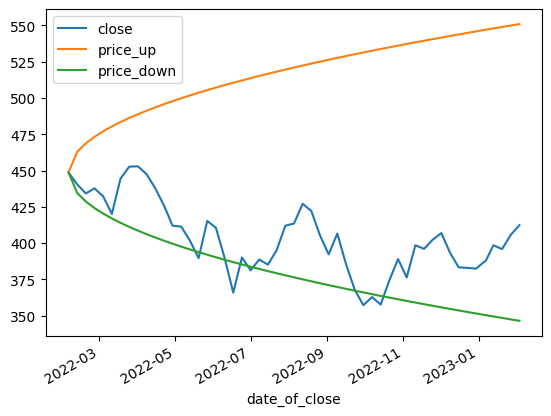

In [22]:
data, VIX = observe_vix_acc('2022-02-04')
print(VIX)
data.plot(x='date_of_close', y=['close', 'price_up', 'price_down'])

In [17]:
data

,open,close,date_of,date_of_close,annual_,vix_d,price_up,price_down
0,459.740,437.98,2022-01-17,2022-01-21,0.000000,0.000000,437.980000,437.980000
1,432.030,441.95,2022-01-24,2022-01-28,0.019178,3.768618,454.485792,421.474208
2,441.240,448.70,2022-01-31,2022-02-04,0.038356,5.329630,461.322714,414.637286
3,449.510,440.46,2022-02-07,2022-02-11,0.057534,6.527437,466.568870,409.391130
4,439.920,434.23,2022-02-14,2022-02-18,0.076712,7.537235,470.991583,404.968417
5,431.890,437.75,2022-02-21,2022-02-25,0.095890,8.426885,474.888072,401.071928
6,432.030,432.17,2022-02-28,2022-03-04,0.115068,9.231190,478.410767,397.549233
7,431.550,420.07,2022-03-07,2022-03-11,0.134247,9.970825,481.650220,394.309780
8,420.890,444.52,2022-03-14,2022-03-18,0.153425,10.659260,484.665429,391.294571
9,444.340,452.69,2022-03-21,2022-03-25,0.172603,11.305853,487.497375,388.462625


In [63]:
sns.lineplot(data=data, x='date_of_close', y=['close'])

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 23 and the vector passed to `y` has length 1.